<a href="https://colab.research.google.com/github/kwanhong66/KaggleShoveling/blob/master/Zillow_EDA_On_Missing_Values_%26_Multicollinearity__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle kernal transcription study #8-1
### Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

- Kernal 주소
  * https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity
- Competition 주소
  * https://www.kaggle.com/c/zillow-prize-1

## Dataset with Kaggle API

In [0]:
!pip3 install -q kaggle

In [2]:
!wget 'https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json'

--2020-03-31 00:32:46--  https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2020-03-31 00:32:47 (13.3 MB/s) - ‘kaggle.json’ saved [63/63]



In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2218           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      17252            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       4640            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        312           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       3231           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6102   

In [6]:
!kaggle competitions download -c zillow-prize-1

 51% 5.00M/9.86M [00:00<00:00, 26.1MB/s]
100% 9.86M/9.86M [00:00<00:00, 39.2MB/s]
 95% 156M/165M [00:02<00:00, 73.8MB/s]
100% 165M/165M [00:02<00:00, 60.1MB/s]
  0% 0.00/18.8k [00:00<?, ?B/s]
100% 18.8k/18.8k [00:00<00:00, 18.9MB/s]
 99% 162M/163M [00:02<00:00, 39.7MB/s]
100% 163M/163M [00:02<00:00, 61.7MB/s]
  0% 0.00/643k [00:00<?, ?B/s]
100% 643k/643k [00:00<00:00, 89.0MB/s]
  0% 0.00/942k [00:00<?, ?B/s]
100% 942k/942k [00:00<00:00, 128MB/s]


In [0]:
!mkdir input

In [8]:
!unzip '*.zip' -d ./input/

Archive:  train_2016_v2.csv.zip
  inflating: ./input/train_2016_v2.csv  

Archive:  train_2017.csv.zip
  inflating: ./input/train_2017.csv  

Archive:  properties_2016.csv.zip
  inflating: ./input/properties_2016.csv  

Archive:  properties_2017.csv.zip
  inflating: ./input/properties_2017.csv  

Archive:  sample_submission.csv.zip
  inflating: ./input/sample_submission.csv  

5 archives were successfully processed.


## The notebook covers Following Topics

- Missing Value Analysis
- Correlation Analysis
- Top Contributing Features (Through XGBoost)
- Correlation Analysis 
- Multicollinearity Analysis
- Univariate Analysis 
- Bivariate Analysis

## Global Imports

In [0]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading in dataset

In [0]:
train = pd.read_csv('input/train_2016_v2.csv', parse_dates=['transactiondate'])
properties = pd.read_csv('input/properties_2016.csv')

## Shape of the dataset

In [11]:
print('Shape of train: ', train.shape)
print('Shape of properties: ', properties.shape)

Shape of train:  (90275, 3)
Shape of properties:  (2985217, 58)


## Lets merge train and properties to facillitate EDA

In [0]:
merged = pd.merge(train, properties, on="parcelid", how="left")

## First few rows of data

In [13]:
merged.head(3).transpose()

,0,1,2
parcelid,11016594,14366692,12098116
logerror,0.0276,-0.1684,-0.004
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
airconditioningtypeid,1,NaN,1
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,2,3.5,3
bedroomcnt,3,4,2
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4


## Visualizing Datatypes

In [14]:
# https://stackoverflow.com/questions/46781835/data-type-not-understood-when-appending-dataframes
data_type_df = pd.DataFrame(merged.dtypes.value_counts()).reset_index().rename(columns={"index": "variableType", 0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.barplot(data=data_type_df, x="variableType", y="count", ax=ax, color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count', title="Variables Count Across Datatype")

TypeError: ignored

TypeError: ignored

<Figure size 1440x360 with 1 Axes>

## Missing value analysis

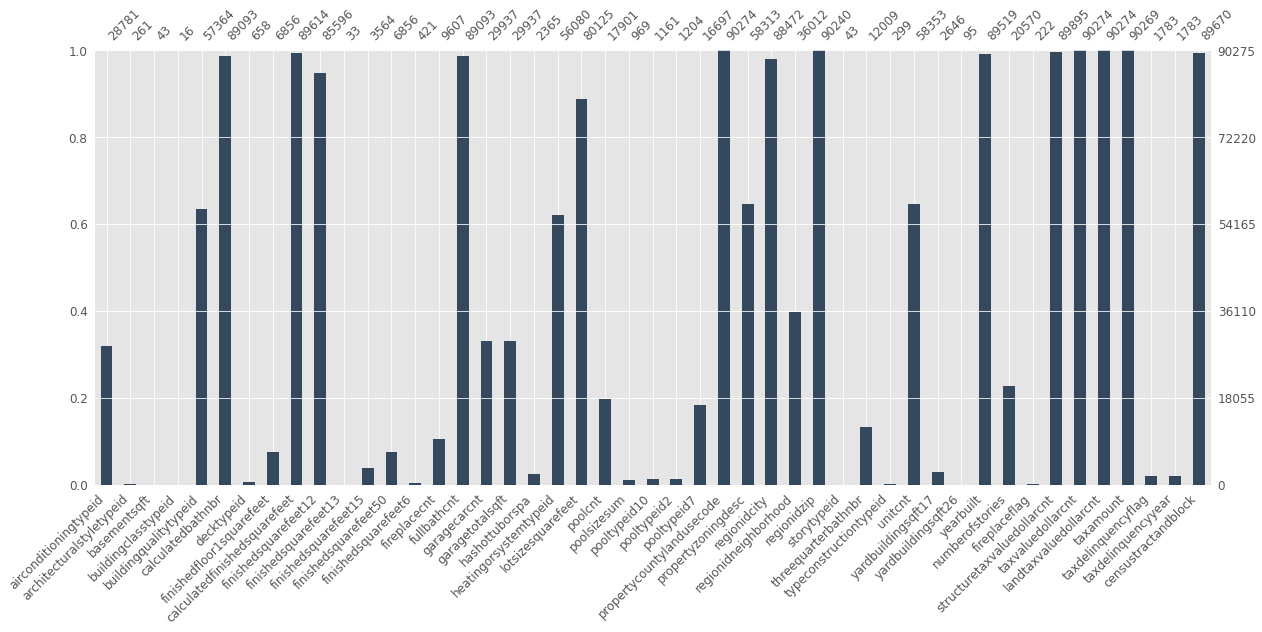

In [15]:
missing_value_columns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missing_value_columns], figsize=(20, 8), color='#34495e', fontsize=12, labels=True)

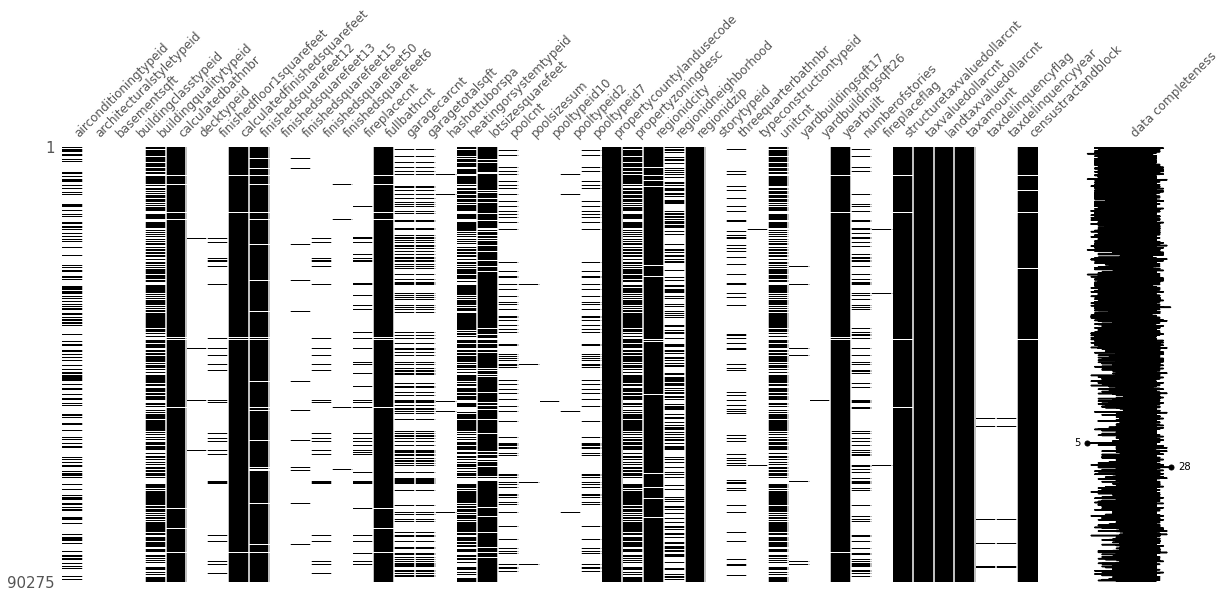

In [16]:
msno.matrix(merged[missing_value_columns], width_ratios=(10, 1),
            figsize=(20, 8), color=(0, 0, 0), fontsize=12, sparkline=True, labels=True)

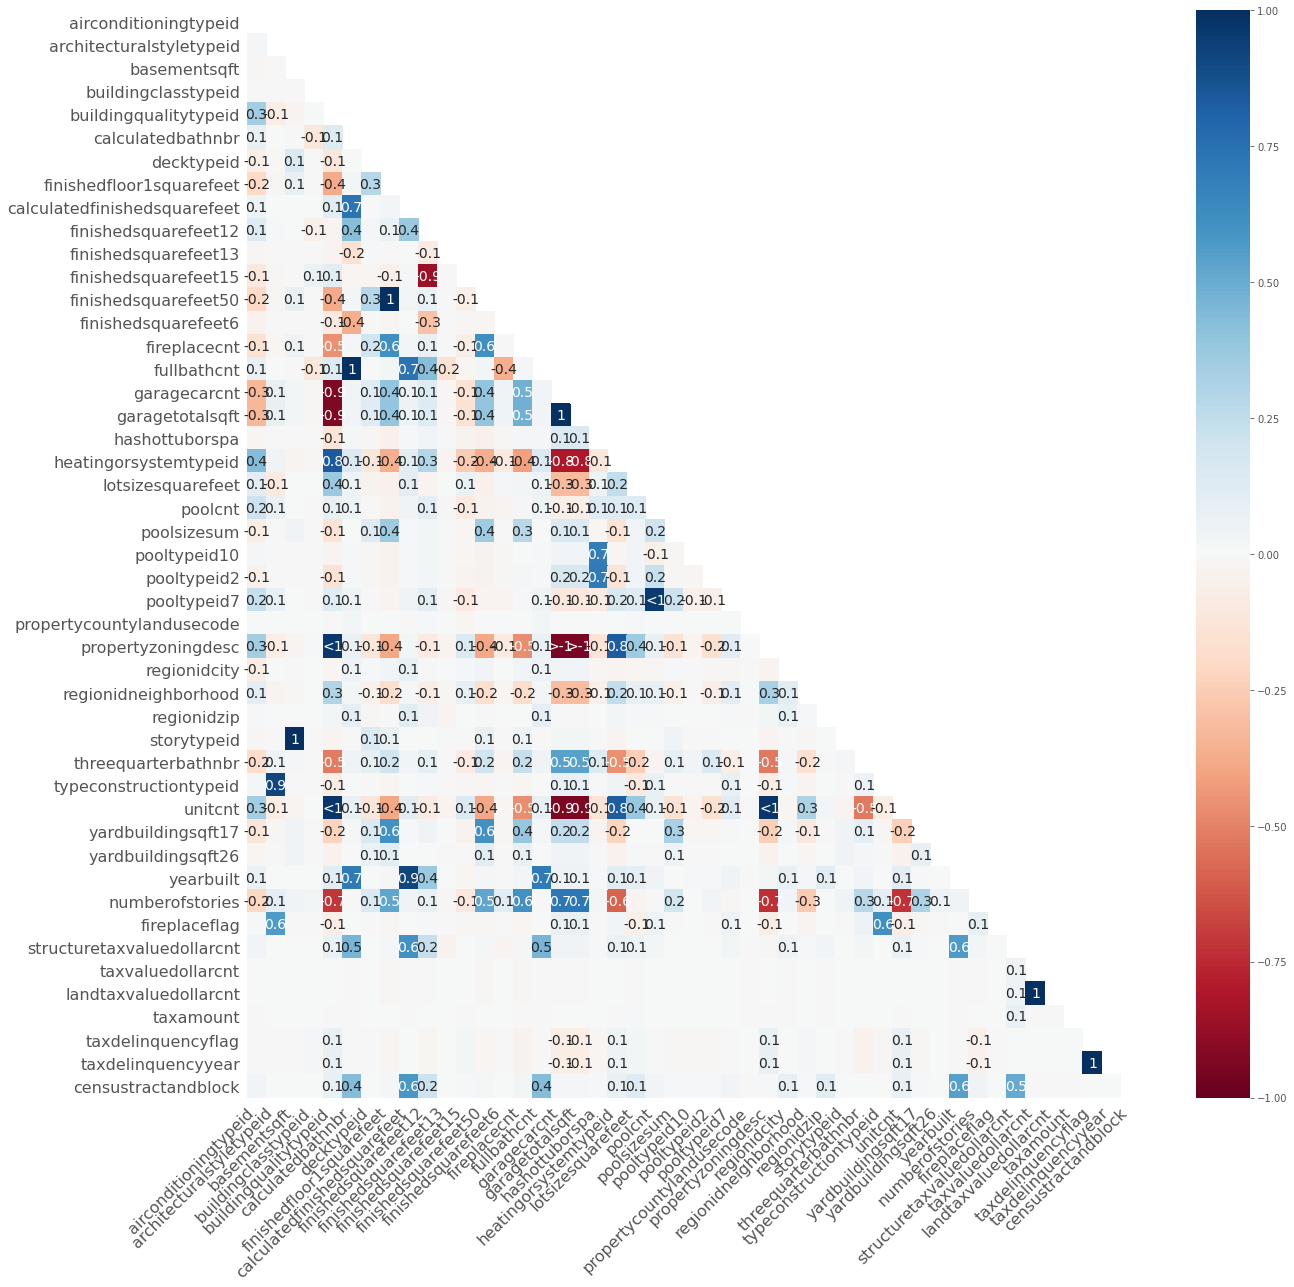

In [17]:
msno.heatmap(merged[missing_value_columns], figsize=(20, 20))

## Top features selection

In [0]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

merged_filtered = merged.fillna(-999)
for f in merged_filtered.columns:
  if merged_filtered[f].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(merged_filtered[f].values))
    merged_filtered[f] = lbl.transform(list(merged_filtered[f].values))

In [0]:
train_y = merged_filtered.logerror.values
train_X = merged_filtered.drop(['parcelid', 'transactiondate', 'logerror'], axis=1)

In [21]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[01:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


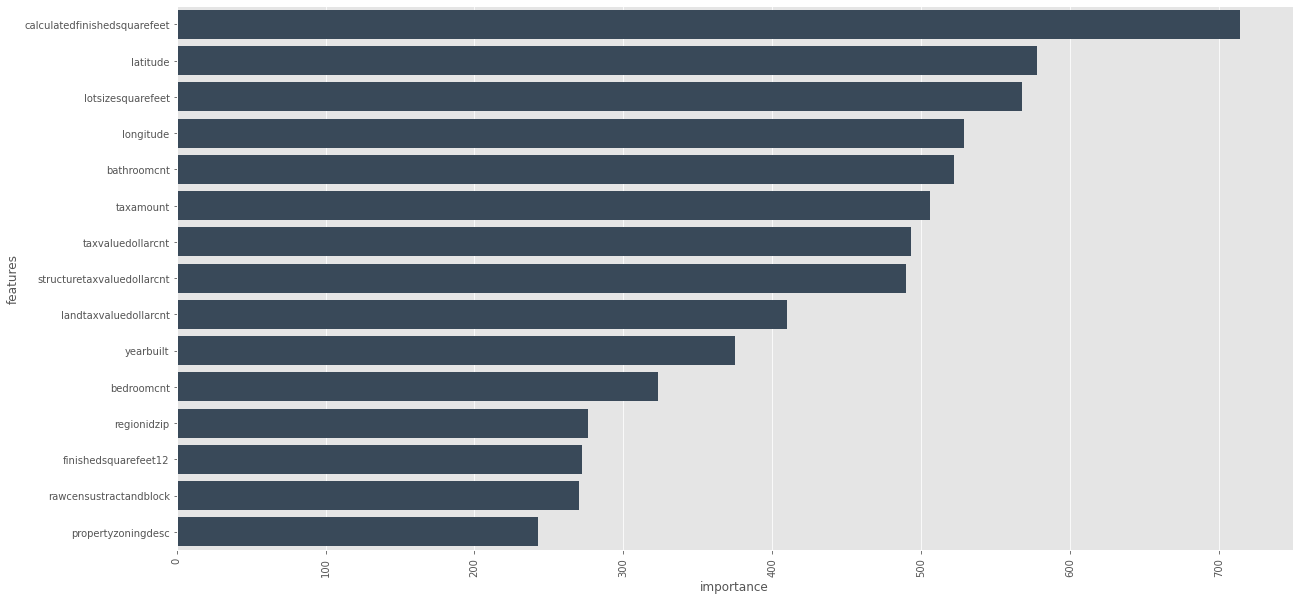

In [24]:
feature_importance = model.get_fscore()
features = pd.DataFrame()
features['features'] = feature_importance.keys()
features['importance'] = feature_importance.values()
features.sort_values(by=['importance'], ascending=False, inplace=True)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15), x='importance', y='features', ax=ax, orient='h', color='#34495e')

## Correlation analysis

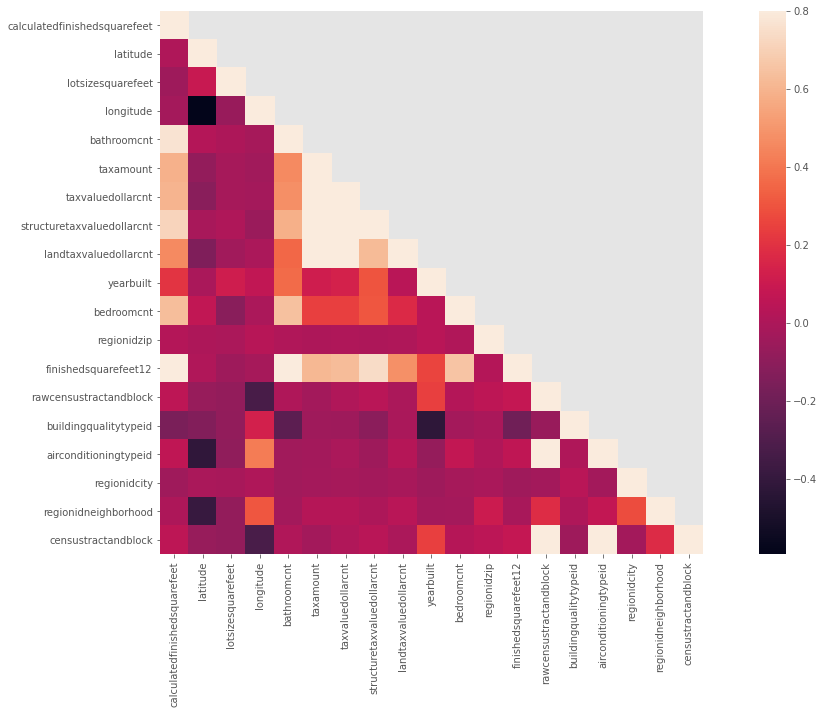

In [27]:
top_features = features['features'].tolist()[:20]
corr_matt = merged[top_features].corr()
mask = np.array(corr_matt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr_matt, mask=mask, vmax= .8, square=True)

## Multicolinearity analysis

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Score'),
 Text(0.5, 1.0, 'Variables Which Exhibit MultiColinearity')]

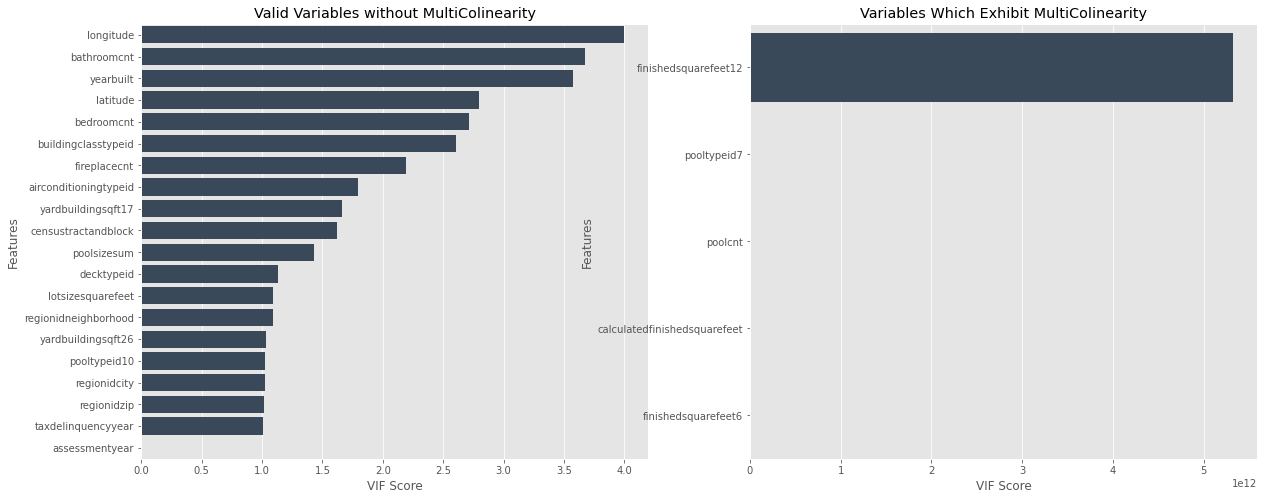

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(X):
  variables = list(X.columns)
  vif = {variable: variance_inflation_factor(exog=X.values, exog_idx=ix) for ix, variable in enumerate(variables)}
  return vif

# filter numerical columns
numerical_col = []
for f in merged.columns:
  if merged[f].dtype != 'object' and f not in ['parcelid', 'transactiondate', 'logerror']:
    numerical_col.append(f)

merged_filtered = merged[numerical_col].fillna(-999)
vif_dict = calculate_vif_(merged_filtered)

vif_df = pd.DataFrame()
vif_df['variables'] = vif_dict.keys()
vif_df['vif_score'] = vif_dict.values()
vif_df.sort_values(by=['vif_score'], ascending=False, inplace=True)
valid_variables = vif_df[vif_df['vif_score'] <= 5]
variables_with_mc = vif_df[vif_df['vif_score'] > 5]

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 8)
sns.barplot(data=valid_variables, x='vif_score', y='variables', ax=ax1, orient='h', color='#34495e')
sns.barplot(data=variables_with_mc.head(5), x='vif_score', y='variables', ax=ax2, orient='h', color='#34495e')
ax1.set(xlabel='VIF Score', ylabel='Features', title='Valid Variables without MultiColinearity')
ax2.set(xlabel='VIF Score', ylabel='Features', title='Variables Which Exhibit MultiColinearity')

## Univariate analysis

Dependent variable logerror follows nice normal distribution

[Text(0, 0.5, 'VIF Score'),
 Text(0.5, 0, 'logerror'),
 Text(0.5, 1.0, 'Distribution of dependent variables')]

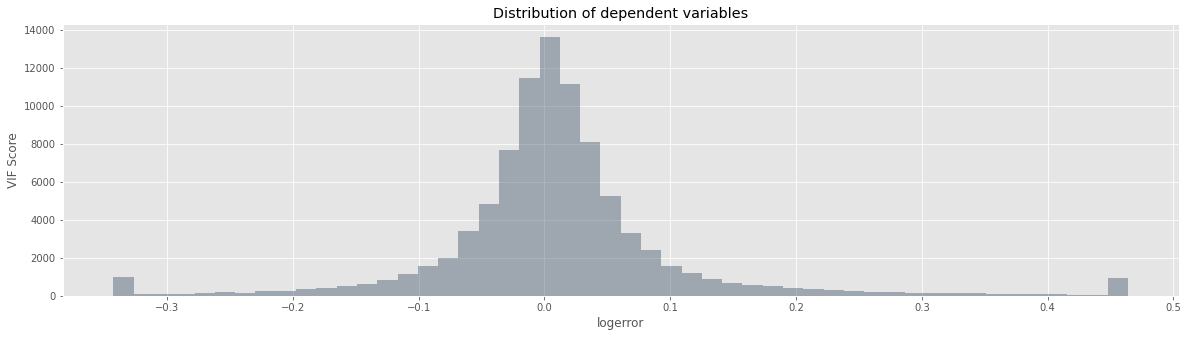

In [41]:
ulimit = np.percentile(merged.logerror.values, 99)
llimit = np.percentile(merged.logerror.values, 1)
# merged['logerror'].ix[merged['logerror'] > ulimit] = ulimit
# merged['logerror'].ix[merged['logerror'] < llimit] = llimit
merged['logerror'].loc[merged['logerror'] > ulimit] = ulimit
merged['logerror'].loc[merged['logerror'] < llimit] = llimit


fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.distplot(merged.logerror.values, bins=50, kde=False, color='#34495e', ax=ax)
ax.set(xlabel='logerror', ylabel='VIF Score', title='Distribution of dependent variables')

## Bivariate analysis

[Text(0, 0.5, 'No of occurences'),
 Text(0.5, 0, 'Month of the year'),
 Text(0.5, 1.0, 'No of occurences across month of 2016'),
 None]

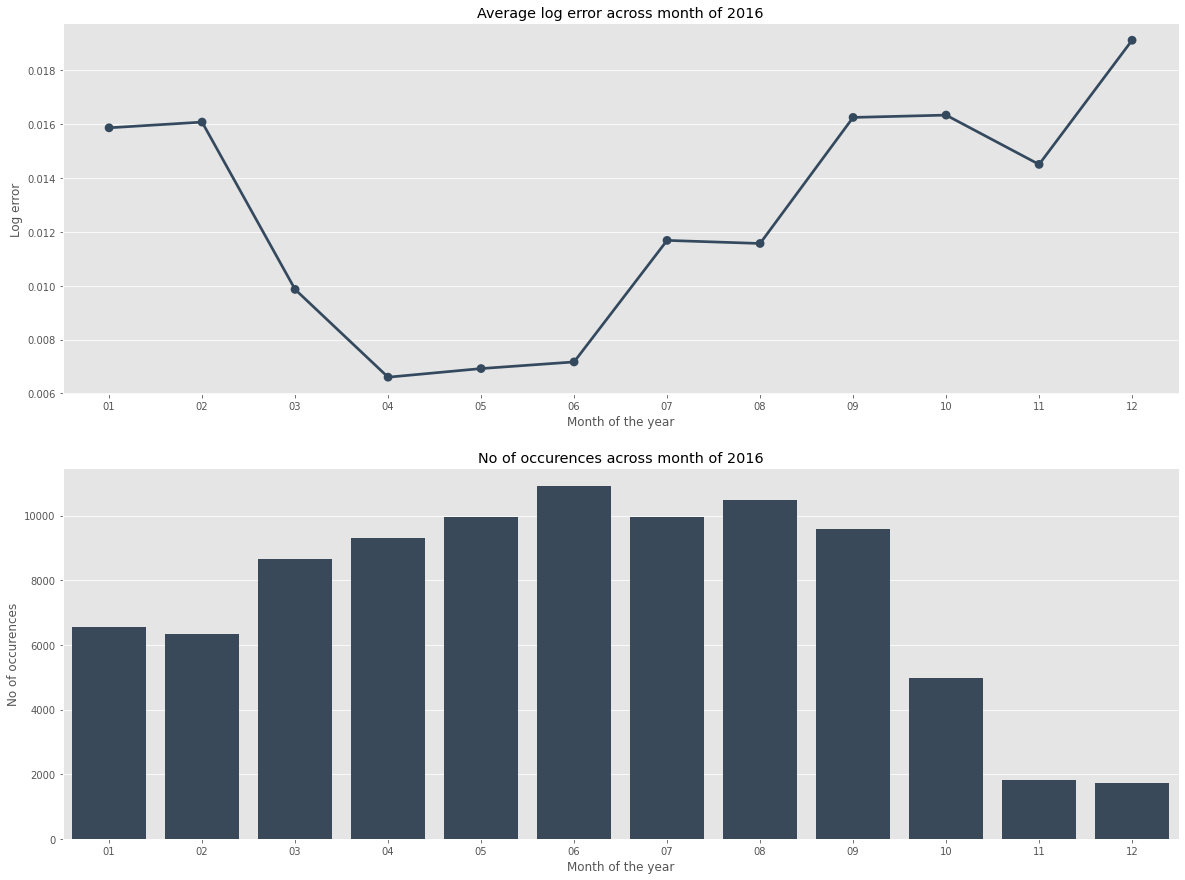

In [48]:
train['year'] = train.transactiondate.map(lambda x: str(x).split('-')[0])
train['month'] = train.transactiondate.map(lambda x: str(x).split('-')[1])
train['day'] = train.transactiondate.map(lambda x: str(x).split('-')[2].split()[0])

train_grouped_month = train.groupby(['month'])['logerror'].mean().to_frame().reset_index()
train_grouped_day = train.groupby(['day'])['logerror'].mean().to_frame().reset_index()
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20, 15)

sns.pointplot(x=train_grouped_month['month'], y=train_grouped_month['logerror'], data=train_grouped_month,
             join=True, ax=ax1, color='#34495e')
ax1.set(xlabel='Month of the year', ylabel='Log error', title='Average log error across month of 2016', label='big')

sns.countplot(x=train['month'], data=train, ax=ax2, color='#34495e')
ax2.set(xlabel='Month of the year', ylabel='No of occurences', title='No of occurences across month of 2016', label='big')

[Text(0, 0.5, 'No of occurences'),
 Text(0.5, 0, 'Day of the month'),
 Text(0.5, 1.0, 'No of occurences across days of the month in 2016'),
 None]

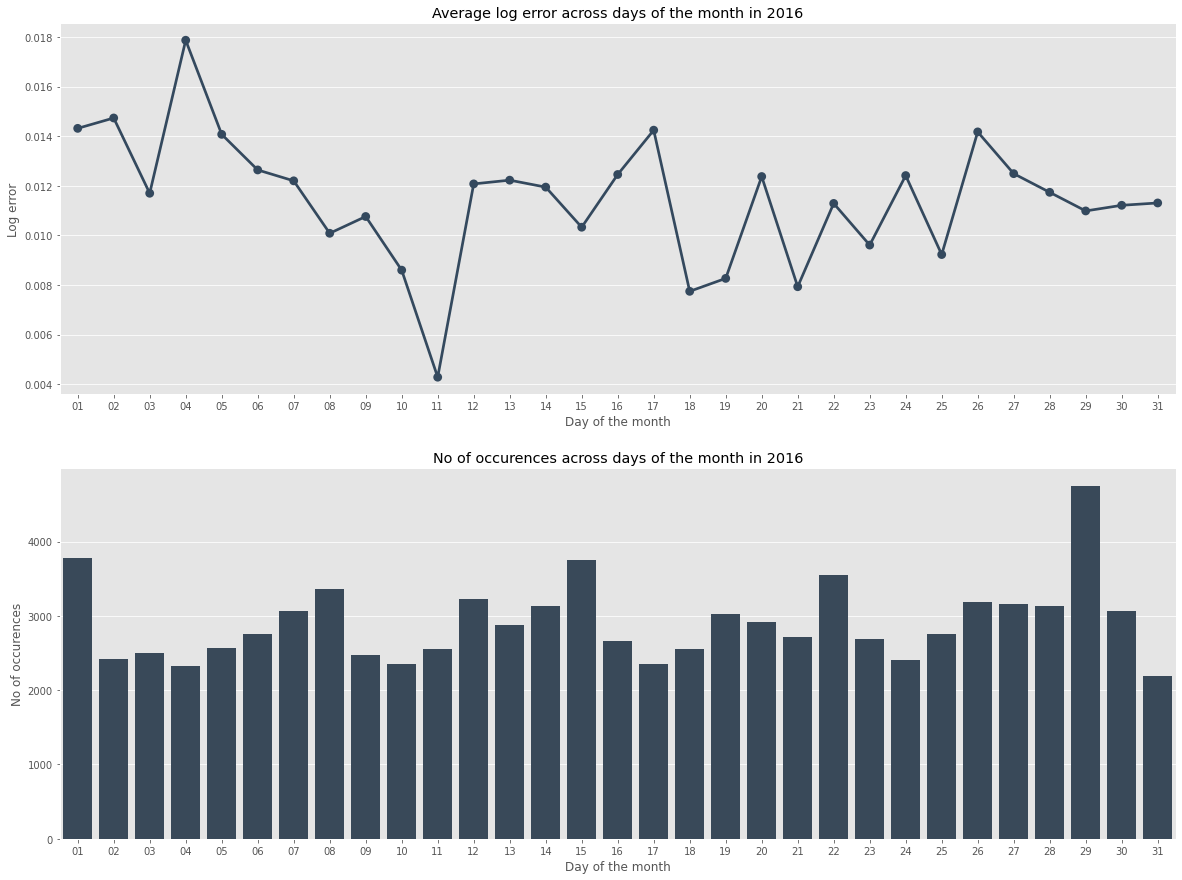

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20, 15)

sns.pointplot(x=train_grouped_day['day'], y=train_grouped_day['logerror'], data=train_grouped_day,
              join=True, ax=ax1, color='#34495e')
ax1.set(xlabel='Day of the month', ylabel='Log error', title='Average log error across days of the month in 2016', label='big')

sns.countplot(x=train['day'], data=train, ax=ax2, color='#34495e')
ax2.set(xlabel='Day of the month', ylabel='No of occurences', title='No of occurences across days of the month in 2016', label='big')

## No of the storey over the years

It is quite interesting to notice people started building more of 2 or 3 storey buildings after 1950

ERROR! Session/line number was not unique in database. History logging moved to new session 59


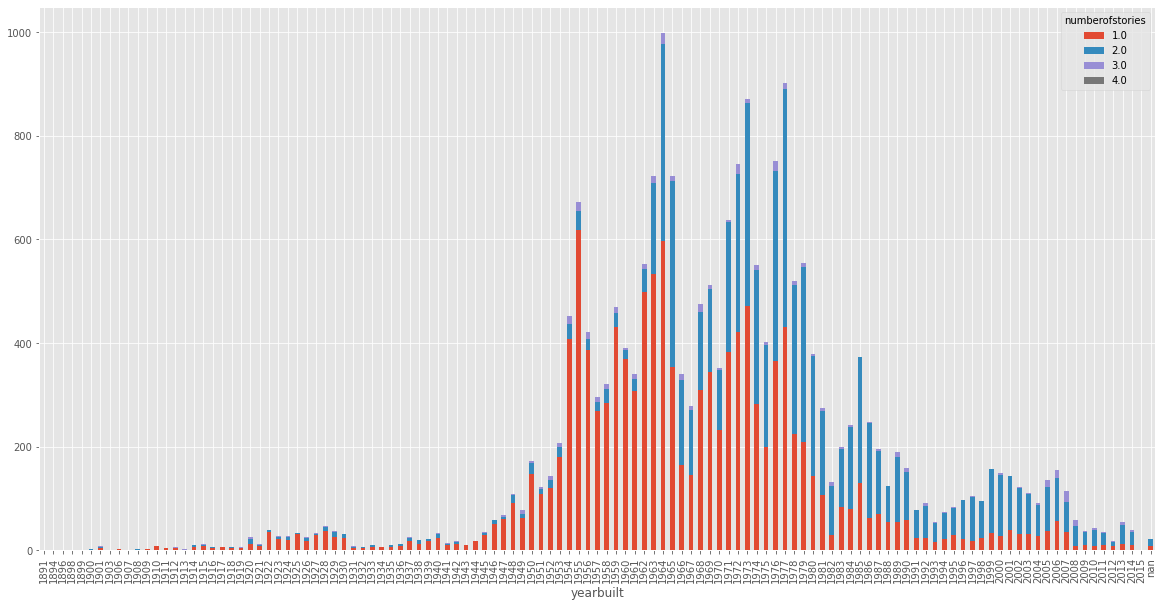

In [54]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
merged['yearbuilt'] = merged['yearbuilt'].map(lambda x: str(x).split('.')[0])
year_merged = merged.groupby(['yearbuilt', 'numberofstories'])['parcelid'].count().unstack('numberofstories').fillna(0)
year_merged.plot(kind='bar', stacked=True, ax=ax1)

In [0]:
cols = ['bathroomcnt', 'bedroomcnt', 'roomcnt', 'numberofstories', 'logerror',
        'calculatedfinishedsquarefeet']

merged_filtered = merged[cols].dropna()
for col in cols:
  ulimit = np.percentile(merged_filtered[col].values, 99.5)
  llimit = np.percentile(merged_filtered[col].values, 0.5)
  merged_filtered[col].loc[merged_filtered[col] > ulimit] = ulimit
  merged_filtered[col].loc[merged_filtered[col] < llimit] = llimit

## Calculated finished square feet vs log error

<Figure size 576x576 with 0 Axes>

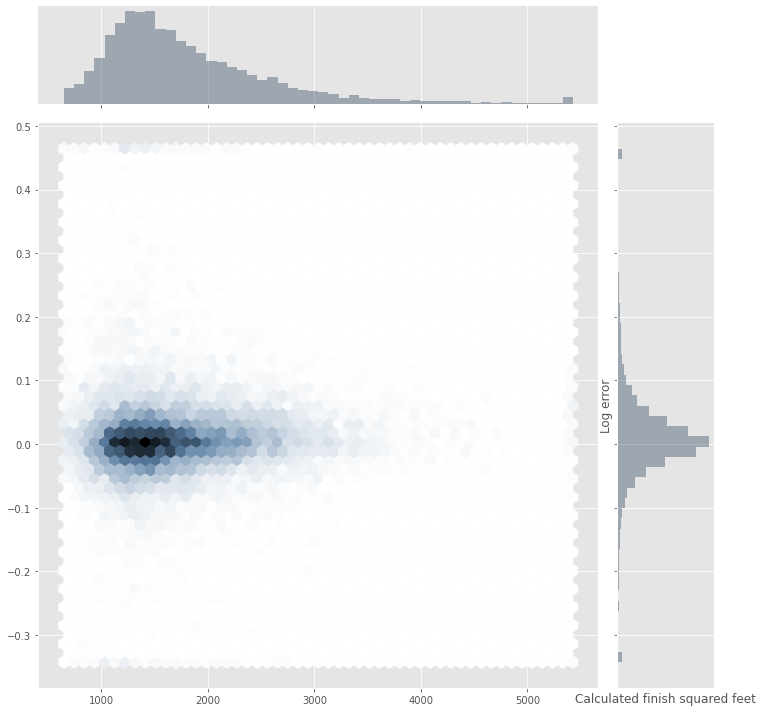

In [58]:
plt.figure(figsize=(8, 8))
sns.jointplot(x=merged_filtered.calculatedfinishedsquarefeet.values, y=merged_filtered.logerror.values,
             size=10, kind='hex', color='#34495e')
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Calculated finish squared feet', fontsize=12)
plt.show()

## Bedroom count vs Log error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Bedroom Count'),
 Text(0.5, 1.0, 'Bedroom Count vs Log Error')]

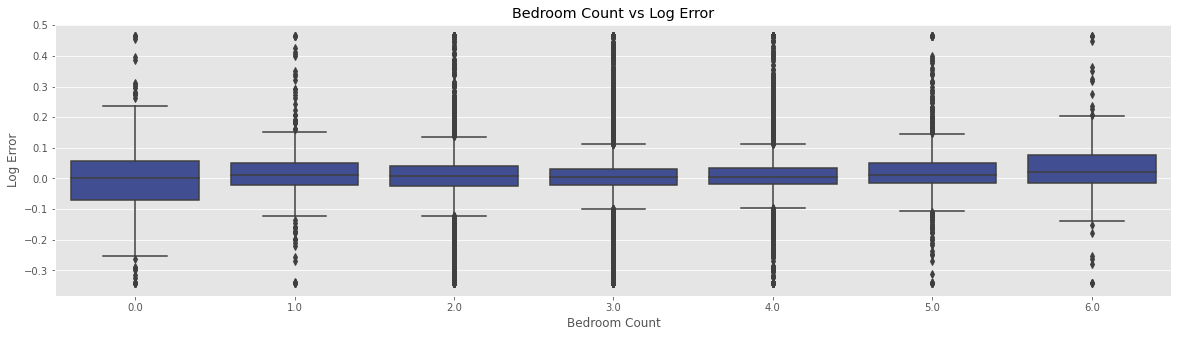

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(x='bedroomcnt', y='logerror', data=merged_filtered, ax=ax, color='#34459e')
ax.set(xlabel='Bedroom Count', ylabel='Log Error', title='Bedroom Count vs Log Error')

## Bathroom count vs Log error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Bathroom Count'),
 Text(0.5, 1.0, 'Bathroom Count vs Log Error')]

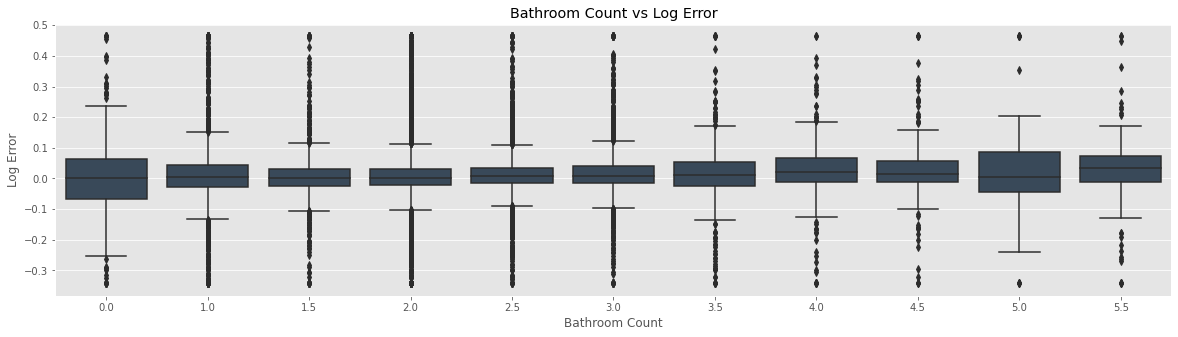

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(x='bathroomcnt', y='logerror', data=merged_filtered, ax=ax, color='#34495e')
ax.set(ylabel='Log Error', xlabel='Bathroom Count', title='Bathroom Count vs Log Error')

## Room count vs Log error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Room Count'),
 Text(0.5, 1.0, 'Room Count vs Log Error')]

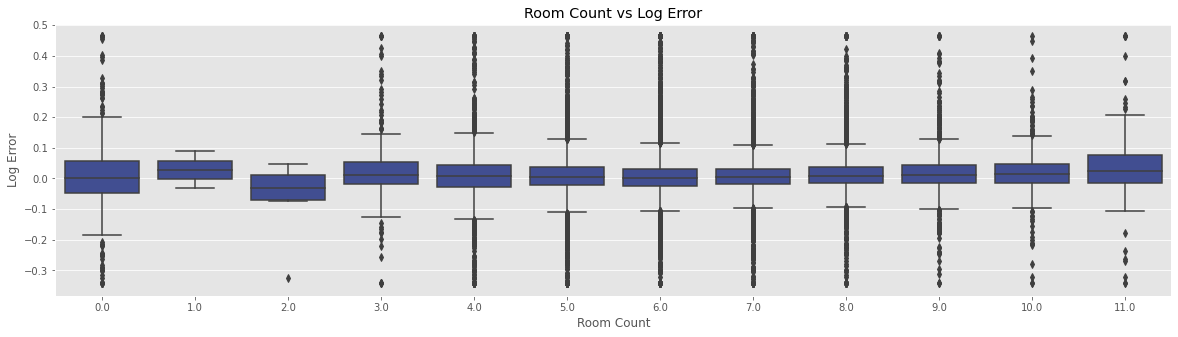

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(x='roomcnt', y='logerror', data=merged_filtered, ax=ax, color='#34459e')
ax.set(ylabel='Log Error', xlabel='Room Count', title='Room Count vs Log Error')

## No of storeys vs Log error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'No of Storeys'),
 Text(0.5, 1.0, 'No of storeys vs Log Error')]

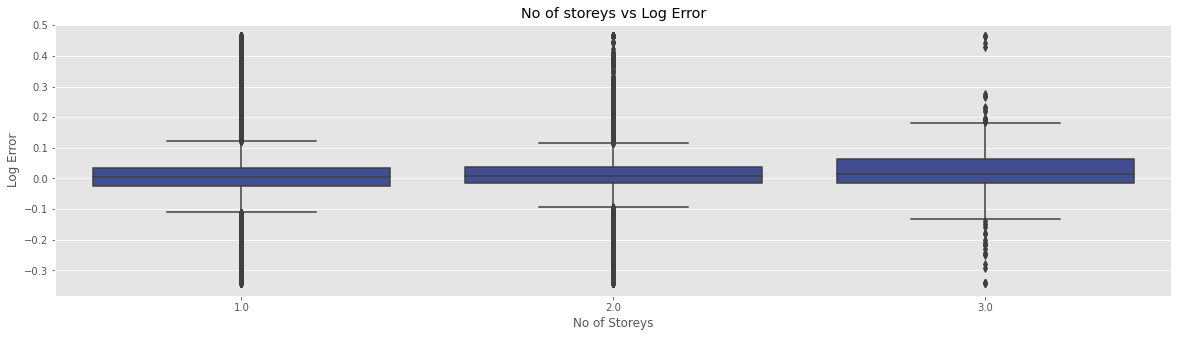

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(x='numberofstories', y='logerror', data=merged_filtered, ax=ax, color='#34459e')
ax.set(ylabel='Log Error', xlabel='No of Storeys', title='No of storeys vs Log Error')

## Bedroom vs Bathroom vs Log error

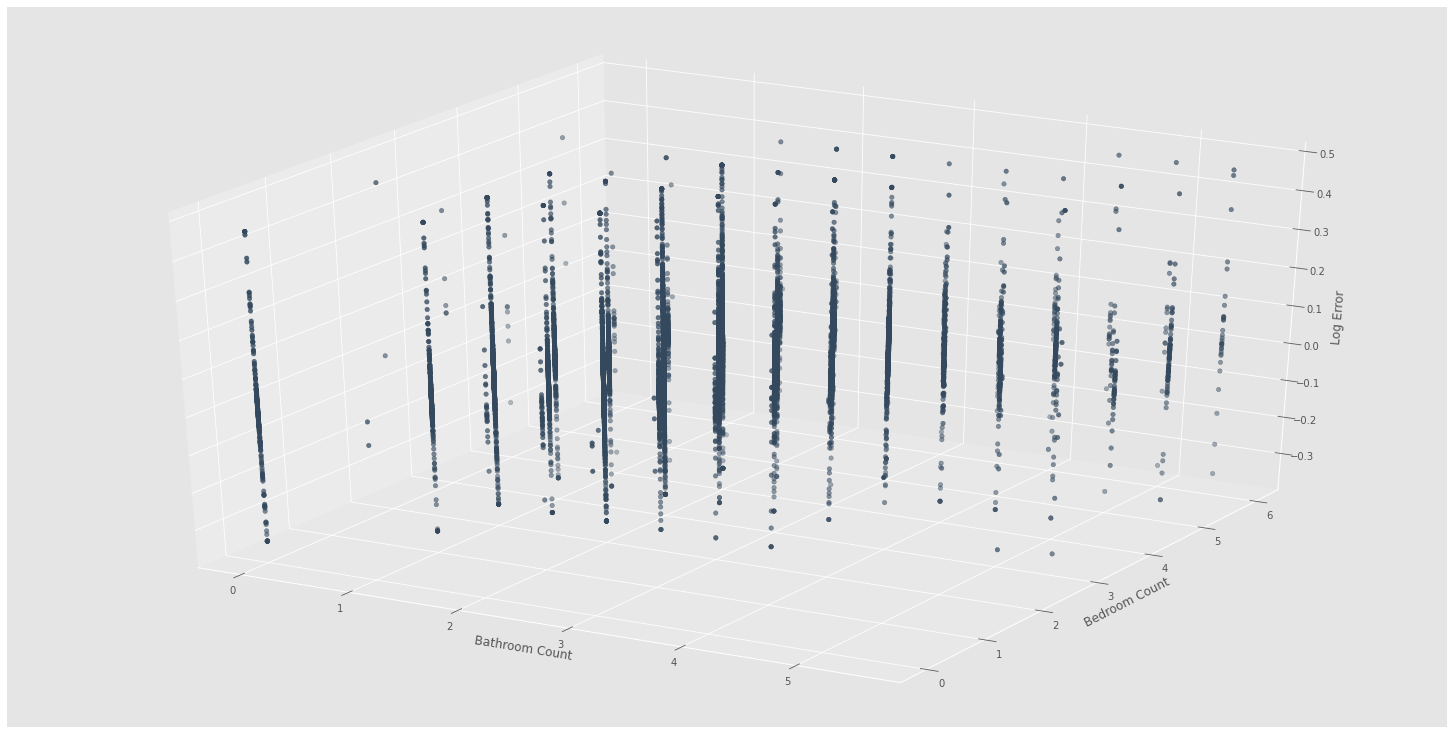

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure()
fig.set_size_inches(20, 10)
ax = Axes3D(fig)

ax.scatter(merged_filtered.bathroomcnt, merged_filtered.bedroomcnt, merged_filtered.logerror,
           color='#34495e')
ax.set_xlabel('Bathroom Count')
ax.set_ylabel('Bedroom Count')
ax.set_zlabel('Log Error')
pyplot.show()